# 6章 学習に関するテクニック
## 6.1 パラメータの更新
#### 6.1.2 確率的勾配降下法
\begin{equation}
{\bf W} \leftarrow {\bf W} - \eta \frac{\partial L}{\partial {\bf W}}
\end{equation}

In [1]:
class SGD(object):

    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):

        for key in params:
            params[key] -= self.lr * grads[key]

下記の式を例に最適化手法を比較する。
\begin{equation}
f(x, y) = \frac{1}{20} x^{2} + y^{2} \quad \quad \text{式(6.2)}
\end{equation}
式(6.2)の勾配は次のようになる：
\begin{equation}
\nabla f(x, y) = \left( \frac{1}{10}x, 2y \right)
\end{equation}

In [2]:
# 式(6.2)の定義
def f(x, y):

    """ Equation 6.2 """
    
    return ((1 / 20) * x**2 + y**2)


# 式(6.2)の勾配の定義
def grad_f(x, y):

    """ The gradient of Equation 6.2 """

    gradient = {
        'x': (1 / 10.0) * x,
        'y': 2 * y
    }

    return gradient

In [3]:
from copy import deepcopy    # 辞書型を値渡しするための関数

def plot_optimizer_steps(x, optimizer, f, grads, max_iters=30, epsilon=1e-6):

    """
    optimizerに指定された最適化手法を使ってfが最小になるxを
    求める際の各ステップの歩みをプロットする
    
    Args:
        x         : 目的関数f(x)を最適化する際の初期値
        optimizer : 最適化手法を定義したクラスのインスタンス
        f         : 最適化する目的関数
        grads     : fの勾配（gradient）
        max_iters : 最適化の最大ステップ数、既定値は30
        epsilon   : 収束判定条件、既定値は1e-6
                    ||x_{n} - x_{n-1}|| < epsilon ⇒ x_{n} は収束したと判定する
    """

    # 最適化の初期値を最初のステップとして保存する
    step_x = [x['x']]   
    step_y = [x['y']]

    prev = deepcopy(x)    # 前回のステップをコピー

    # 最適化を実行
    for i in range(max_iters):
        optimizer.update(params=x, grads=grads(**x))
        step_x.append(x['x'])
        step_y.append(x['y'])

        sum_sq = 0
        for key in x:
            sum_sq += (x[key] - prev[key])**2

        is_converge = abs(np.sqrt(sum_sq)) < epsilon
        if is_converge:
            break

        prev = deepcopy(x)

    # グラフを描画する
    x = np.arange(start=-10, stop=10, step=0.1)
    y = np.arange(start=-10, stop=10, step=0.1)
    x, y = np.meshgrid(x, y)
    plt.figure()
    plt.contour(x, y, f(x, y), levels=np.arange(start=0, stop=10, step=1))
    plt.plot([-10, 10], [0, 0], 'k--')   # 水平線の追加
    plt.plot([0, 0], [-10, 10], 'k--')   # 縦線の追加
    plt.plot(0, 0, 'k+')                 # 原点に'+'を表示
    plt.plot(step_x, step_y, 'ro')
    plt.plot(step_x, step_y, 'r-')

    print('最大反復回数:', max_iters)
    print('反復回数:', i + 1)
    print('収束したか？:', is_converge)

最大反復回数: 30
反復回数: 30
収束したか？: False


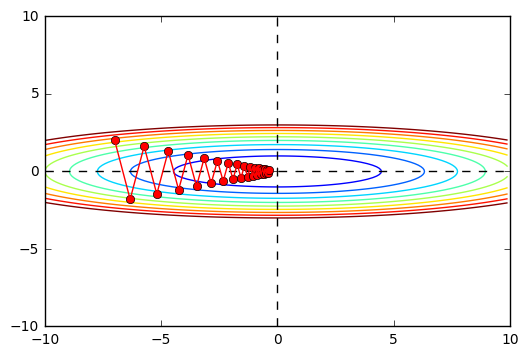

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = {'x': -7, 'y': 2}         # 最適化の初期値
learning_rate = 0.95          # 最適化の学習率
sgd = SGD(lr=learning_rate)   # 最適化を行うインスタンスを作成

plot_optimizer_steps(x=x, optimizer=sgd, f=f, grads=grad_f)

#### 6.1.4 Momentum
\begin{equation}
{\bf v} \leftarrow \alpha {\bf v} - \eta \frac{\partial L}{\partial \bf W} \\
{\bf W} \leftarrow {\bf W} + {\bf v}
\end{equation}

In [5]:
import numpy as np

class Momentum(object):

    def __init__(self, lr=0.01, momentum=0.9):

        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):

        if not self.v:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params:
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

最大反復回数: 30
反復回数: 30
収束したか？: False


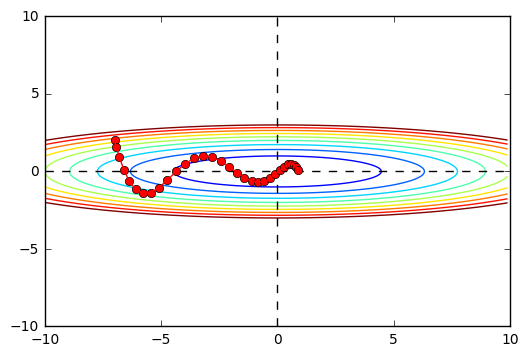

In [6]:
x = {'x': -7, 'y': 2}         # 最適化の初期値
learning_rate = 0.1           # 最適化の学習率
momentum = Momentum(lr=learning_rate)

plot_optimizer_steps(x=x, optimizer=momentum, f=f, grads=grad_f)

#### 6.1.5 AdaGrad
\begin{equation}
{\bf h} \leftarrow {\bf h} + \frac{\partial L}{\partial {\bf W}} \odot \frac{\partial L}{\partial {\bf W}} \\
{\bf W} \leftarrow {\bf W} - \eta \frac{1}{\sqrt{\bf h}} \frac{\partial L}{\partial {\bf W}}
\end{equation}

In [7]:
import numpy as np

class AdaGrad(object):

    def __init__(self, lr=0.01):

        self.lr = lr
        self.h = None
    
    def update(self, params, grads):

        if not self.h:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params:
            # self.h[key] += grads[key] * grads[key]ではエラーが発生したため下記に修正
            self.h[key] = self.h[key] + (grads[key] * grads[key])
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

最大反復回数: 30
反復回数: 30
収束したか？: False


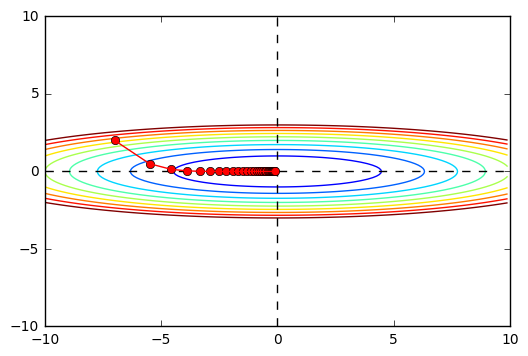

In [8]:
x = {'x': -7, 'y': 2}         # 最適化の初期値
learning_rate = 1.5           # 最適化の学習率
adagrad = AdaGrad(lr=learning_rate)

plot_optimizer_steps(x=x, optimizer=adagrad, f=f, grads=grad_f)

#### 6.1.6 Adam

In [9]:
# common/optimizer.pyより

class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         

        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)

            # 元のコードではエラーが発生するため修正版を適用する
            # self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            # self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            self.m[key] = self.m[key] + (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] = self.v[key] + (1 - self.beta2) * (grads[key]**2 - self.v[key])

            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

最大反復回数: 30
反復回数: 30
収束したか？: False


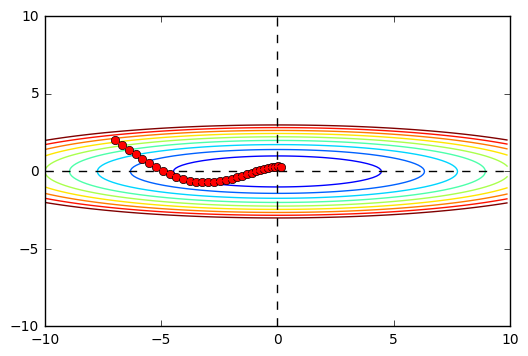

In [10]:
x = {'x': -7, 'y': 2}         # 最適化の初期値
learning_rate = 0.3           # 最適化の学習率
adam = Adam(lr=learning_rate)

plot_optimizer_steps(x=x, optimizer=adam, f=f, grads=grad_f)

In [11]:
class Dropout(object):

    def __init__(self, dropout_ratio=0.5):

        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_fig=True):

        if train_fig:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):

        return dout * self.mask